In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [5]:
class COVID19GeoSpatialModel:
    def __init__(self):
        """
        TODO: Initialize model parameters
        self.populations: population in each grid
        self.high_income_proportion: proportion of high income population
        self.activity_rates: activity rates for each cell (mobility)
        self.epsilon: intercell vs. intracell transmission trade-off
        self.race_distribution
        self.ses_distribution: social economic distribution
        self.q_base: base transmission probability
        self.activity_weighted_sum:
        self.q_i: contact in D_i becomes a tranmission
        """
        self.populations, self.high_income_proportion = self.initialize_grid_parameters()
        
        self.activity_rates = [2 for _ in range(9)]
        self.epsilon = 0.5
        
        self.race_distribution, self.ses_distribution = self.initialize_race_ses_parameters()
        
        self.q_base = 0.5  
        self.activity_weighted_sum = self.calculate_activity_weighted_sum()
        self.q_i = self.estimate_transmission_probability()

    def initialize_grid_parameters(self):
        populations = [1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600] # random choose values, will be adjusted based on Michigan county data
        high_income_proportion = 0.4 # random choose value
        return populations, high_income_proportion

    def initialize_race_ses_parameters(self):
        # define race and SES distributions for each cell
        # upon to adjust based on ACS or US Census information
        # now we assume equal distribution among 3 races and 3 SES
        race_dist = np.full((9, 3), 1/3)  
        ses_dist = np.full((9, 3), 1/3) 
        return race_dist, ses_dist

    def calculate_activity_weighted_sum(self):
        return sum(a * N for a, N in zip(self.activity_rates, self.populations))

    def estimate_transmission_probability(self):
        # should be adjusted to a logistic regression for q_i
        # based on race and SES
        # assume for simplicity for now
        q_i = [self.q_base for _ in range(9)]  
        return q_i

    def calculate_transmission_rate(self, i, j):
        # maybe make this part more structured and easy to understand. 
        if i != j:
            beta = (1 - self.epsilon) * self.q_i[i] * (self.activity_rates[i] * self.activity_rates[j]) / self.activity_weighted_sum
        else:
            beta = ((1 - self.epsilon) * self.q_i[i] * (self.activity_rates[i] ** 2) / self.activity_weighted_sum) + \
                   (self.epsilon * self.q_i[i] * self.activity_rates[i] / self.populations[i])
        return beta

    def run_simulation(self):
        beta_example = self.calculate_transmission_rate(0, 1)
        print(f"Example Transmission Rate (D_1 to D_2): {beta_example}")
        self.grid_plot()

    def grid_plot(self):
        beta_matrix = np.zeros((3, 3))
        for i in range(3):
            for j in range(3):
                beta_matrix[i, j] = self.calculate_transmission_rate(i * 3 + j, i * 3 + j)
        sns.heatmap(beta_matrix, annot=True, fmt=".6f", cmap="viridis")
        plt.title("Intracell Transmission Rates")
        plt.show()

Example Transmission Rate (D_1 to D_2): 3.08641975308642e-05


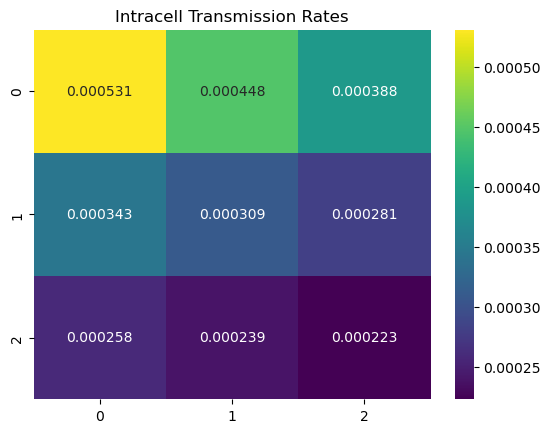

In [6]:
model = COVID19GeoSpatialModel()
model.run_simulation() # not sure why only first row displayed

In [7]:
0.00531*140

0.7434